In [1]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfNtFlattenHox, ctcfFlattenHox, ntFlattenHox, radNtFlattenHox, radFlattenHox), axis=0)


2024-10-02 13:12:07.294096: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 13:12:07.340314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [2]:
# Generate contact maps from distance maps 
contactThresholdHox = 250

ctcfNtContactHox = ctcfNtMapsHox < contactThresholdHox
ctcfContactHox = ctcfMapsHox < contactThresholdHox
ntContactHox = ntMapsHox < contactThresholdHox
radNtContactHox = radNtMapsHox < contactThresholdHox
radContactHox = radMapsHox < contactThresholdHox

# Generate flatten contact maps
ctcfNtContactFlattenHox = np.array([x.flatten() for x in ctcfNtContactHox])
ctcfContactFlattenHox = np.array([x.flatten() for x in ctcfContactHox])
ntContactFlattenHox = np.array([x.flatten() for x in ntContactHox])
radNtContactFlattenHox = np.array([x.flatten() for x in radNtContactHox])
radContactFlattenHox = np.array([x.flatten() for x in radContactHox])

allContactFlattenHox = np.concatenate((ctcfNtContactFlattenHox, ctcfContactFlattenHox, ntContactFlattenHox, radNtContactFlattenHox, radContactFlattenHox), axis=0)

In [3]:
# Import LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=50, random_state=42, verbose=2, n_jobs=-1)

In [4]:
lda.fit(allContactFlattenHox)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.0min remaining:  1.0min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   51.3s remaining:   51.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   53.0s remaining:   53.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   59.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   49.5s remaining:   49.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   59.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   51.7s remaining:   51.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   53.8s remaining:   53.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   59.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   49.6s remaining:   49.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   52.6s remaining:   52.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   58.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   51.3s remaining:   51.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   52.1s remaining:   52.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   41.1s remaining:   41.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   51.0s finished


LatentDirichletAllocation(n_components=50, n_jobs=-1, random_state=42,
                          verbose=2)

In [5]:
ntLDAHox = lda.transform(ntFlattenHox)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.7min finished


In [47]:
rad21LDAHox = lda.transform(radFlattenHox)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   54.1s remaining:   54.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished


In [6]:
ntLDAHox.shape

(15319, 50)

In [7]:
hoxLDAComponents = lda.components_

In [8]:
hoxLDAComponents.shape

(50, 5184)

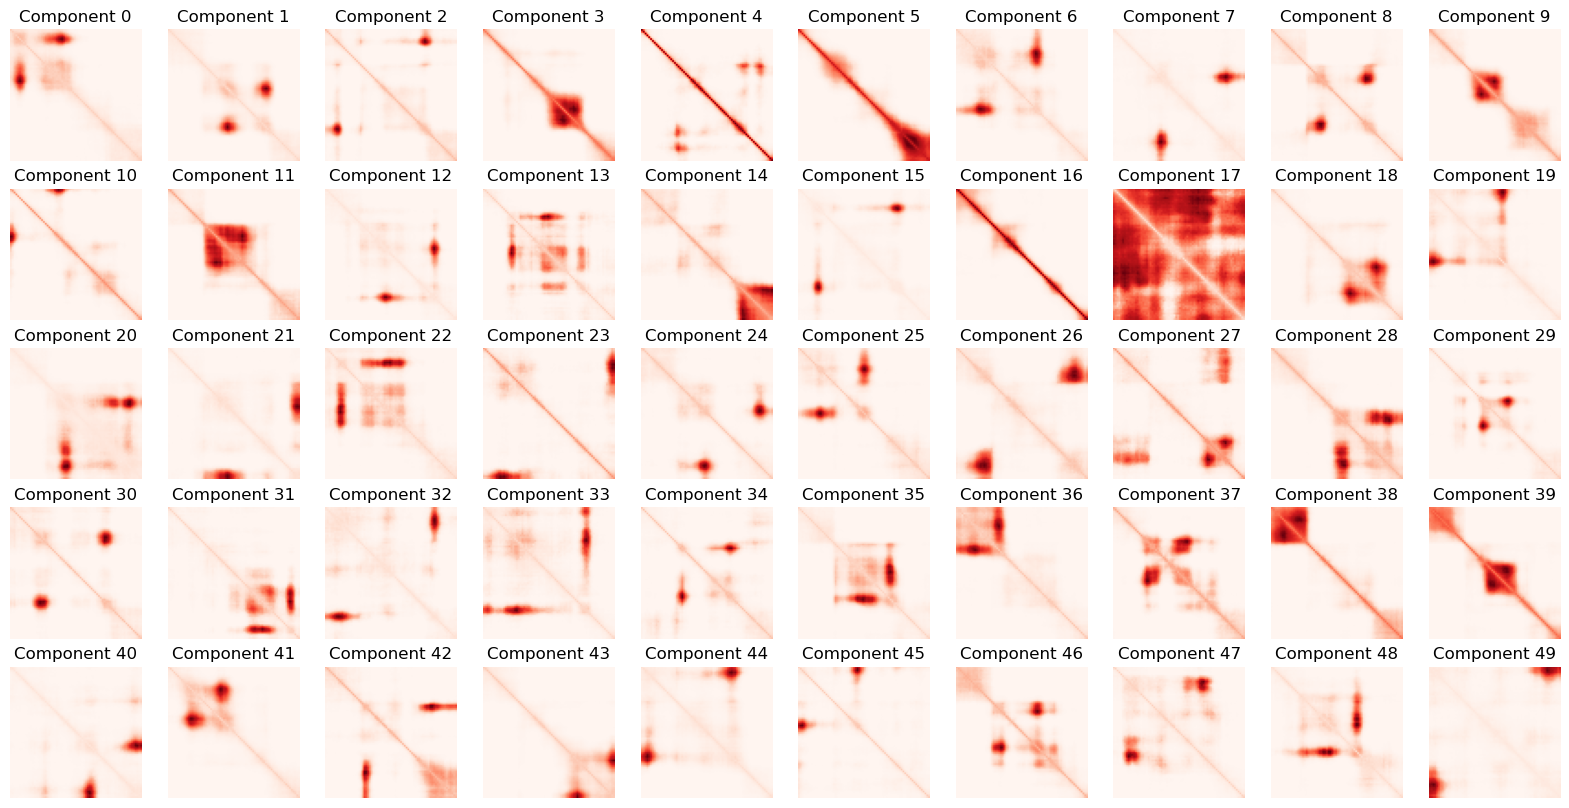

In [21]:
# Plot the LDA components
fig, ax = plt.subplots(5, 10, figsize=(20, 10))
for i in range(5):
    for j in range(10):
        ax[i, j].imshow(hoxLDAComponents[i*10+j].reshape(nHox, nHox), cmap='Reds')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'Component {i*10+j}')

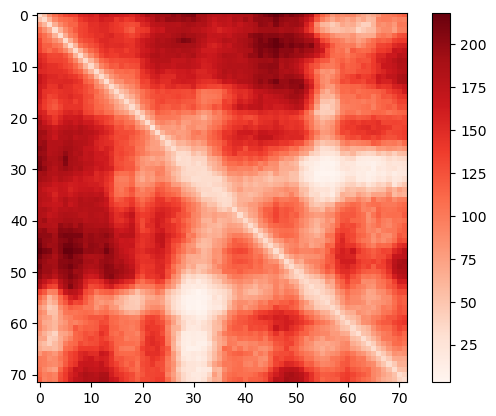

In [22]:
plt.imshow(hoxLDAComponents[17].reshape(nHox, nHox), cmap='Reds')
plt.colorbar()

In [19]:
np.argmax(ntLDAHox, axis=1)

array([17, 17, 17, ..., 17, 17, 17])

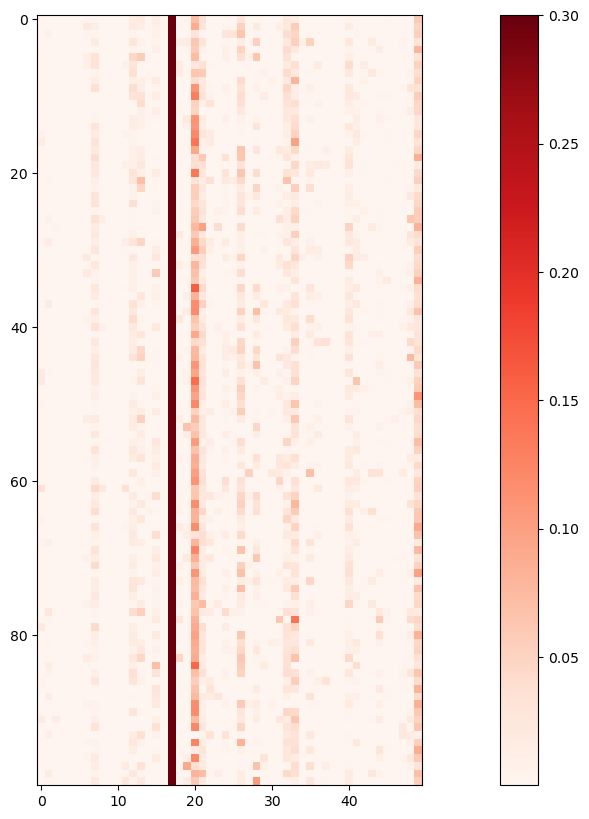

In [46]:
# Plot the value of ntLDAHox
plt.figure(figsize=(20, 10))
plt.imshow(ntLDAHox[:100], cmap='Reds', vmax=0.3)
plt.colorbar()

In [50]:
ntLDAHox_estimation = (ntLDAHox @ hoxLDAComponents)

In [51]:
ntLDAHox_estimation_map = ntLDAHox_estimation.reshape(-1, nHox, nHox)

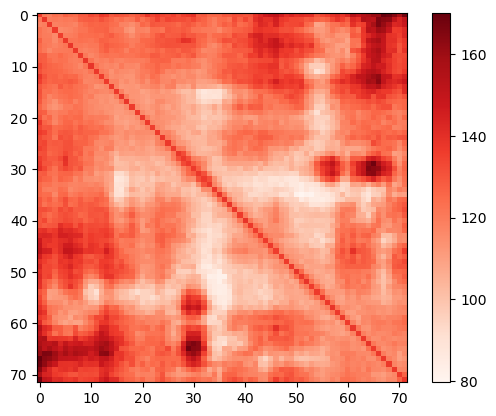

In [52]:
plt.imshow(np.median(ntLDAHox_estimation_map, axis=0), cmap='Reds')
plt.colorbar()

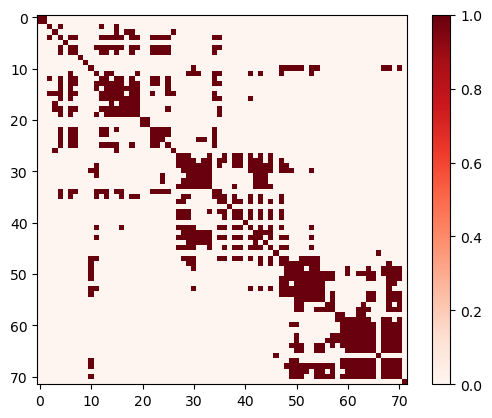

In [45]:
plt.imshow(ntContactHox[1502], cmap='Reds')
plt.colorbar()

In [12]:
ntLDAHox.shape

(15319, 50)